In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_file_path = './data/btc_usdt_data.csv'

gdd.download_file_from_google_drive(file_id='1y22f1z5rww1urbgeZlTzRQBKWVBzvLt5',
                                    dest_path=data_file_path)

In [2]:
import pandas as pd

df = pd.read_json(data_file_path)

df

Open      High       Low     Close       Volume
2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83    47.181009
2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32    23.234916
2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35     7.229691
2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99     4.443249
2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69     0.972807
...                       ...       ...       ...       ...          ...
2020-10-28 16:00:00  13221.26  13221.50  13043.21  13142.02  5267.225157
2020-10-28 17:00:00  13142.02  13219.00  13000.01  13182.88  4071.954897
2020-10-28 18:00:00  13182.89  13240.00  13134.33  13209.86  2630.685999
2020-10-28 19:00:00  13209.87  13255.00  13145.38  13165.31  3068.601046
2020-10-28 20:00:00  13165.32  13202.90  13151.07  13196.20   434.659346

[27941 rows x 5 columns]

In [ ]:
!pip3 install neuralprophet
!pip3 install pystan
!pip3 install fbprophet

In [3]:
import numpy as np

In [4]:
series = pd.Series(df['Close'].values, index=df.index)

data = pd.DataFrame(series.copy())

data.columns = ["y"]

data = data.resample("D").mean()

data = data.dropna()

In [5]:
data['ds'] = data.index

In [6]:
data.isna().sum()

y     0
ds    0
dtype: int64

In [7]:
data

y         ds
2017-08-17   4360.571500 2017-08-17
2017-08-18   4233.007500 2017-08-18
2017-08-19   4065.299583 2017-08-19
2017-08-20   4124.093750 2017-08-20
2017-08-21   4033.844167 2017-08-21
...                  ...        ...
2020-10-24  13015.298750 2020-10-24
2020-10-25  13039.306667 2020-10-25
2020-10-26  13054.535833 2020-10-26
2020-10-27  13368.790833 2020-10-27
2020-10-28  13459.646667 2020-10-28

[1169 rows x 2 columns]

In [9]:
from neuralprophet import NeuralProphet


In [ ]:
min_lags = 1 
max_lags = 365
min_hidden_layers = 1
max_hidden_layers = 10
min_ar_sparsity=0.01
max_ar_sparsity=0.5

min_mae = float("inf")


future = m.make_future_dataframe(data, periods=7)

for n_lags in range(min_lags, max_lags, 20):
    for n_hidden_layers in range(min_hidden_layers, max_hidden_layers, 1):
        for n_ar_sparsity in np.linspace(0.01, 0.5, 10):
            m = NeuralProphet(n_forecasts=7,
                n_lags=n_lags,
                num_hidden_layers=n_hidden_layers,
                ar_sparsity=n_ar_sparsity,
                yearly_seasonality=False,
                weekly_seasonality=False,
                daily_seasonality=False)

            metrics = m.fit(data, freq="D")

            new_mae = metrics['MAE'].iloc[-1] 

            if new_mae < min_mae:
                
                new_best_param = (n_lags, n_hidden_layers, n_ar_sparsity)
                print("""


                     """)

                print(new_best_param)


                min_mae = new_mae

In [89]:
df_val.index[0]

0

In [82]:

df_train, df_val = neural_model.split_df(data, valid_p=0.2)

neural_model = NeuralProphet(n_lags=30,
    num_hidden_layers=5,
    ar_sparsity=0.01,
    batch_size=32,
    epochs=30,
    n_forecasts=7,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False)

metrics = neural_model.fit(df_train, freq='D')
val_metrics = neural_model.test(df_val)
# neural_future = neural_model.make_future_dataframe(data, periods = 365, n_historic_predictions=len(data))
# neural_forecast = neural_model.predict(neural_future)

# # Plot the Predictions
# neural_figure = neural_model.plot(neural_forecast)


 74%|███████▍  | 74/100 [00:00<00:00, 178.75it/s]
INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-02
Epoch[30/30]: 100%|██████████| 30/30 [00:06<00:00,  4.71it/s, SmoothL1Loss=0.00329, MAE=503, RegLoss=0.771]
INFO: nprophet - _evaluate: Validation metrics:    SmoothL1Loss     MAE
1         0.002 406.643


In [86]:
neural_future

ds             y         t  y_scaled
0  2020-09-29  10732.537500  0.975171  0.838394
1  2020-09-30  10738.503750  0.976027  0.838980
2  2020-10-01  10749.780000  0.976884  0.840088
3  2020-10-02  10525.043750  0.977740  0.818015
4  2020-10-03  10547.534167  0.978596  0.820224
5  2020-10-04  10602.393750  0.979452  0.825612
6  2020-10-05  10704.137083  0.980308  0.835605
7  2020-10-06  10691.300833  0.981164  0.834344
8  2020-10-07  10620.899583  0.982021  0.827429
9  2020-10-08  10736.921667  0.982877  0.838825
10 2020-10-09  10980.522500  0.983733  0.862750
11 2020-10-10  11331.731250  0.984589  0.897245
12 2020-10-11  11359.779583  0.985445  0.900000
13 2020-10-12  11446.784167  0.986301  0.908545
14 2020-10-13  11443.298333  0.987158  0.908203
15 2020-10-14  11397.016667  0.988014  0.903657
16 2020-10-15  11409.607083  0.988870  0.904894
17 2020-10-16  11357.797917  0.989726  0.899805
18 2020-10-17  11340.836250  0.990582  0.898139
19 2020-10-18  11426.645417  0.991438  0.906567
20 2020-10-19  11579.728333  0.992295  0.921603
21 2020-10-20  11840.088333  0.993151  0.947175
22 2020-10-21  12466.406667  0.994007  1.008690
23 2020-10-22  12916.540417  0.994863  1.052901
24 2020-10-23  12920.482500  0.995719  1.053288
25 2020-10-24  13015.298750  0.996575  1.062600
26 2020-10-25  13039.306667  0.997432  1.064958
27 2020-10-26  13054.535833  0.998288  1.066454
28 2020-10-27  13368.790833  0.999144  1.097319
29 2020-10-28  13459.646667  1.000000  1.106243
30 2020-10-29           NaN  1.000856       NaN
31 2020-10-30           NaN  1.001712       NaN
32 2020-10-31           NaN  1.002568       NaN
33 2020-11-01           NaN  1.003425       NaN
34 2020-11-02           NaN  1.004281       NaN
35 2020-11-03           NaN  1.005137       NaN
36 2020-11-04           NaN  1.005993       NaN

In [85]:
val_metrics['MAE'][0]

406.6433410644531

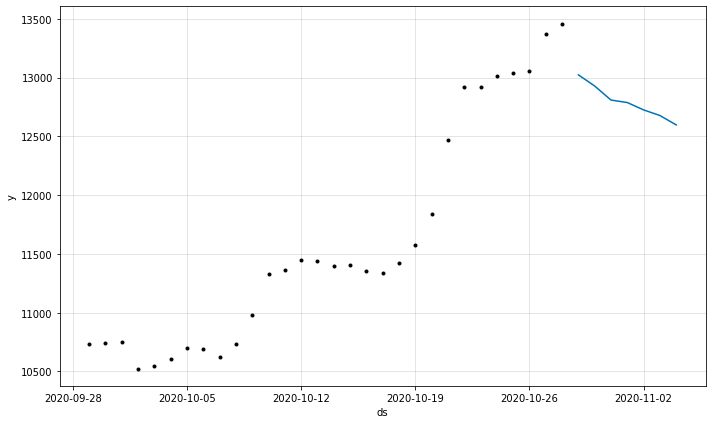

In [74]:
neural_future = neural_model.make_future_dataframe(data, periods = 7)
neural_forecast = neural_model.predict(neural_future)

# Plot the Predictions
neural_figure = neural_model.plot(neural_forecast)

In [79]:
i=1
for _, row in neural_forecast.tail(7).iterrows():
    print(row[f'yhat{i}'])
    i+=1

13023.998046875
12928.8212890625
12809.4306640625
12788.2861328125
12725.703125
12677.888671875
12597.9287109375


In [ ]:
neural_forecast

In [ ]:
neural_forecast.tail(7)

In [ ]:
train_ind = int(0.8*len(data))
train_X = data[:train_ind]
train_y = data[:train_ind]
test_X = data[train_ind:]
test_y = data[train_ind:]

In [ ]:
m = NeuralProphet(n_forecasts=len(test_X),
    n_lags=30,
    num_hidden_layers=5,
    ar_sparsity=0.30,
    batch_size=32,
    epochs=60,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False)
metrics = m.fit(train_X, freq="D")
future = m.make_future_dataframe(train_X, periods=len(test_X))
forecast = m.predict(future)

In [ ]:
forecast

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
m.plot(forecast)

In [ ]:
plt.plot(test_y['y'].values)

In [ ]:
forecast

In [ ]:
forecast.tail(7)


In [ ]:
forecasts_plot = m.plot(forecast.tail(7))